<a href="https://colab.research.google.com/github/PeterRutkowski/dav-homework5/blob/master/dav_homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from scipy import stats

In [0]:
def import_data(index):
  data = pd.read_csv('drive/My Drive/dav-homework5/ans.csv')

  x = data['x%d' % (index)]
  y = data['y%d' % (index)]
  x = np.asarray(x)
  y = np.asarray(y)
  return x.flatten(), y.flatten()

In [0]:
print(data)

    Unnamed: 0  x1  x2  x3  x4     y1    y2     y3     y4
0            1  10  10  10   8   8.04  9.14   7.46   6.58
1            2   8   8   8   8   6.95  8.14   6.77   5.76
2            3  13  13  13   8   7.58  8.74  12.74   7.71
3            4   9   9   9   8   8.81  8.77   7.11   8.84
4            5  11  11  11   8   8.33  9.26   7.81   8.47
5            6  14  14  14   8   9.96  8.10   8.84   7.04
6            7   6   6   6   8   7.24  6.13   6.08   5.25
7            8   4   4   4  19   4.26  3.10   5.39  12.50
8            9  12  12  12   8  10.84  9.13   8.15   5.56
9           10   7   7   7   8   4.82  7.26   6.42   7.91
10          11   5   5   5   8   5.68  4.74   5.73   6.89


In [0]:
def statistics(x, y):
  x_mean = np.mean(x)
  x_var = np.var(x)
  y_mean = np.mean(y)
  y_var = np.var(y)
  slope, intercept, correlation, p_value, std_err = stats.linregress(x,y)
  determination = correlation**2

  return x_mean, x_var, y_mean, y_var, correlation, slope, intercept, determination

In [0]:
print(statistics(x1, y1))
print(statistics(x2, y2))
print(statistics(x3, y3))
print(statistics(x4, y4))

(9.0, 10.0, 7.500909090909093, 3.7520628099173554, 0.8164205163448399, 0.5000909090909091, 3.0000909090909103, 0.666542459508775)
(9.0, 10.0, 7.50090909090909, 3.752390082644628, 0.816236506000243, 0.5000000000000001, 3.000909090909089, 0.6662420337274847)
(9.0, 10.0, 7.5, 3.747836363636364, 0.8162867394895984, 0.4997272727272729, 3.002454545454544, 0.6663240410665595)
(9.0, 10.0, 7.500909090909091, 3.7484082644628103, 0.8165214368885028, 0.4999090909090909, 3.0017272727272726, 0.6667072568984652)


In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [0]:
def subplot_axes(ax, i, j):
  ax.set_xlim(0,20)
  ax.set_ylim(0,14)
  ax.set_xticks(np.arange(0,20,2))
  ax.set_yticks(np.arange(0,14,2))
  ax.text(-0.1, 0.5, 'y'+str(2*i+j+1), va='center', ha='center', size=7,
          color='black', transform=ax.transAxes, rotation='vertical')
  ax.text(0.5, -0.18, 'x'+str(2*i+j+1), va='center', ha='center', size=7,
          color='black', transform=ax.transAxes)
  ax.tick_params(axis='x', colors='black', labelsize=7.0, length=2.0)
  ax.tick_params(axis='y', colors='black', labelsize=7.0, length=2.0)

In [0]:
def scatter_plot(ax, i, j):
  x, y = import_data(2*i + j + 1)
  ax.scatter(x, y, s=15, alpha=0.8, c='orange', edgecolors='red', linewidths=0.5)

In [0]:
def line_plot(ax):
  x = np.linspace(0, 20, 10)
  y = 0.5*x + 3
  ax.plot(x, y, linewidth=0.8, c='blue')

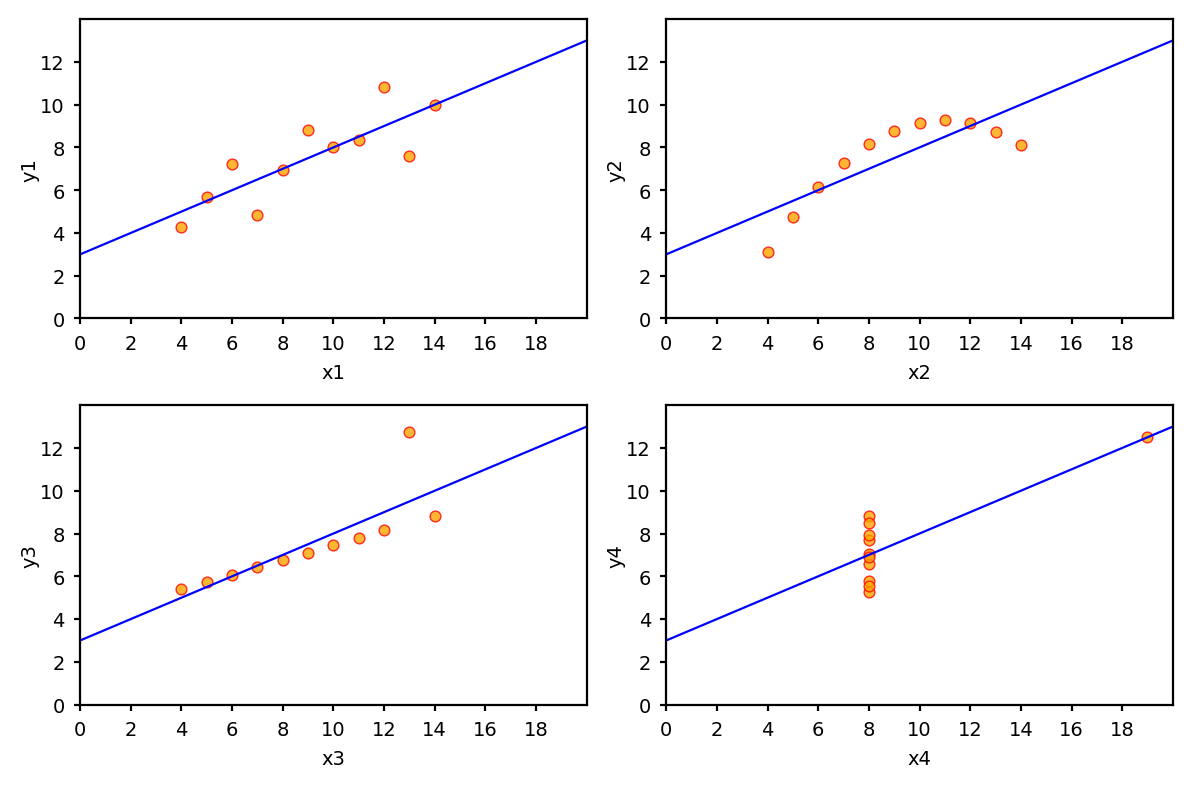

In [0]:
fig, ax = plt.subplots(2,2)
fig.patch.set_facecolor('xkcd:white')

for i in range(len(ax)):
  for j in range(len(ax[i])):
    subplot_axes(ax[i][j],i,j)
    scatter_plot(ax[i][j],i,j)
    line_plot(ax[i][j])

plt.tight_layout(pad=1.0)
plt.show(fig)

In [0]:
import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv('drive/My Drive/dav-homework5/ans2.tsv', sep='\t')

In [22]:
print(data)

         dataset          x          y
0              d  55.384600  97.179500
1              d  51.538500  96.025600
2              d  46.153800  94.487200
3              d  42.820500  91.410300
4              d  40.769200  88.333300
...          ...        ...        ...
1841  wide_lines  33.674442  26.090490
1842  wide_lines  75.627255  37.128752
1843  wide_lines  40.610125  89.136240
1844  wide_lines  39.114366  96.481751
1845  wide_lines  34.583829  89.588902

[1846 rows x 3 columns]


In [23]:
datasets = np.asarray(data['dataset'])
datasets = np.unique(datasets)
print(datasets)

['a' 'bullseye' 'circle' 'd' 'dots' 'h' 'high' 's' 'slant_down' 'slant_up'
 'v' 'wide_lines' 'x']


In [0]:
def import_dataset(dataset):
  data = pd.read_csv('drive/My Drive/dav-homework5/ans2.tsv', sep='\t')
  x, y = [], []
  for index, row in data.iterrows():
    if row['dataset'] == dataset:
      x.append(row['x'])
      y.append(row['y'])
  return np.asarray(x), np.asarray(y)

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [0]:
def plots(datasets, ax):
  print(ax.shape)
  for i in range(len(datasets)):
    x, y = import_dataset(datasets[i])
    index_1 = int((i-i%4)/4)
    index_2 = int(i%4)
    ax[index_1,index_2].plot(x,y)

(4, 4)


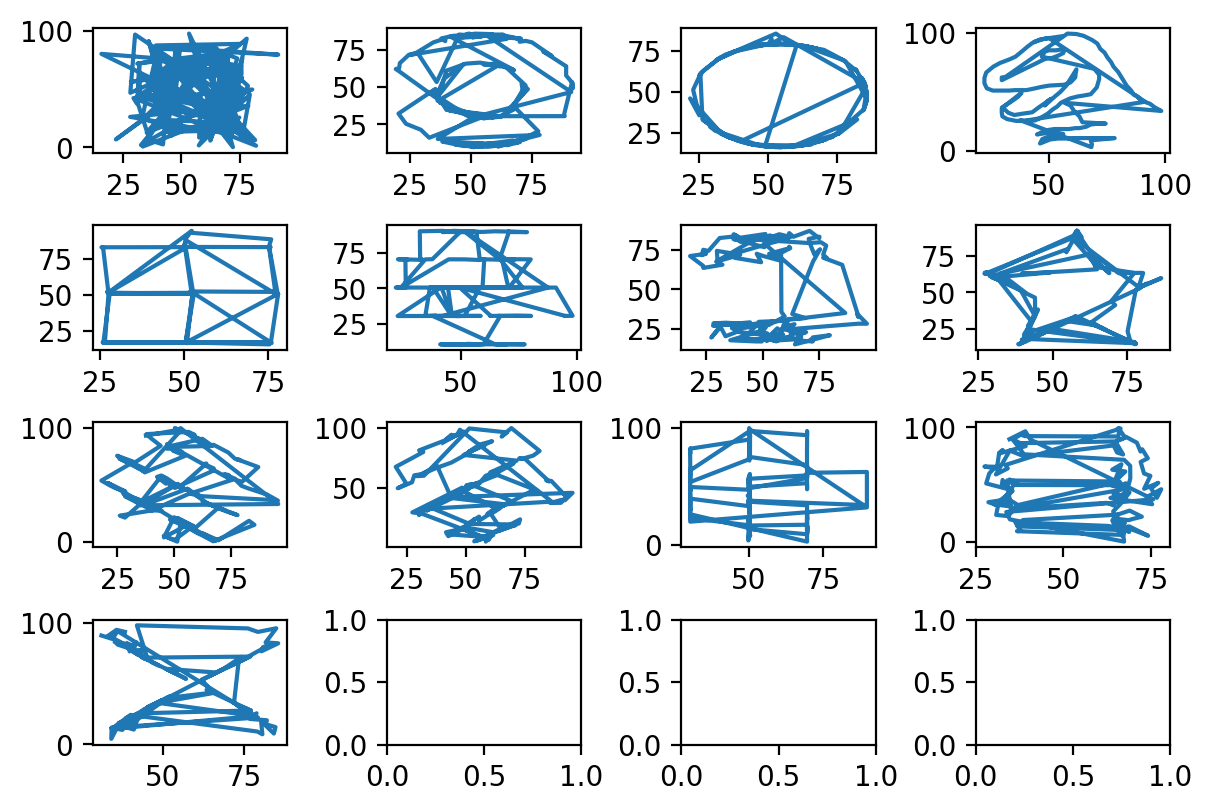

In [41]:
fig, ax = plt.subplots(4,4)
fig.patch.set_facecolor('xkcd:white')
plots(datasets, ax)
plt.tight_layout(pad=0.5)